In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('top-1000-movies.csv')
data.head()

,Rank,Title,Release Date,URL,Production Cost,Worldwide Gross,Genre,Runtime,Year
0,1,Gladiator II,2024-11-05,https://www.gladiator.movie,310000000,435417355,"Action, Adventure, Drama",148,2024.0
1,2,Your Fault,2024-12-26,https://www.amazon.com/dp/B0DJ1L7ZN3,0,0,"Romance, Drama",120,2024.0
2,3,Red One,2024-10-31,https://www.amazon.com/salp/redonemovie,250000000,182861176,"Action, Fantasy, Comedy",124,2024.0
3,4,Venom: The Last Dance,2024-10-22,https://venom.movie,120000000,476391878,"Action, Science Fiction, Adventure, Thriller",109,2024.0
4,5,Sonic the Hedgehog 3,2024-12-19,https://www.sonicthehedgehogmovie.com,122000000,211552146,"Action, Science Fiction, Comedy, Family",110,2024.0


In [3]:
data.isna().sum()

Rank               0
Title              0
Release Date       3
URL                0
Production Cost    0
Worldwide Gross    0
Genre              4
Runtime            0
Year               3
dtype: int64

In [4]:
data = data.dropna()

In [5]:
data['Year'].unique()

array([2024., 2023., 2022., 1979., 2007., 2027., 2017., 2026., 1992.,
       2010., 2020., 2025., 2000., 2009., 2001., 2018., 2021., 2002.,
       2014., 1994., 2011., 1972., 2019., 2004., 1997., 2003., 2005.,
       2008., 2016., 2015., 1977., 2012., 2013., 1995., 1998., 1999.,
       2006., 1974., 1982., 1984., 1966., 1950., 1983., 1993., 1985.,
       1946., 1976., 1990., 1987., 1986., 1939., 1989., 1991., 1938.,
       1996., 1988., 1968., 1978., 1975.])

In [6]:
data.describe()

,Rank,Production Cost,Worldwide Gross,Runtime,Year
count,993.000000,9.930000e+02,9.930000e+02,993.000000,993.000000
mean,499.121853,5.635960e+07,2.260586e+08,107.610272,2016.591138
std,289.168131,7.698975e+07,3.589119e+08,33.003851,11.705647
min,1.000000,0.000000e+00,0.000000e+00,0.000000,1938.000000
25%,249.000000,0.000000e+00,0.000000e+00,92.000000,2013.000000
50%,497.000000,1.600000e+07,3.791798e+07,107.000000,2022.000000
75%,750.000000,9.000000e+07,3.521143e+08,125.000000,2024.000000
max,1000.000000,4.600000e+08,2.799439e+09,242.000000,2027.000000


In [7]:
production_greater_than_zero = data[data['Production Cost'] > 0].shape[0]

In [8]:
production_greater_than_zero

641

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 993 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             993 non-null    int64  
 1   Title            993 non-null    object 
 2   Release Date     993 non-null    object 
 3   URL              993 non-null    object 
 4   Production Cost  993 non-null    int64  
 5   Worldwide Gross  993 non-null    int64  
 6   Genre            993 non-null    object 
 7   Runtime          993 non-null    int64  
 8   Year             993 non-null    float64
dtypes: float64(1), int64(4), object(4)
memory usage: 77.6+ KB


In [10]:
for column in data.columns:
    mean_value = data['Production Cost'][data['Production Cost'] != 0].mean()  # Calculate mean excluding zeros
    data.loc[data['Production Cost'] == 0, 'Production Cost'] = mean_value

C:\Users\Ahmed Tarek\AppData\Local\Temp\ipykernel_21116\214425827.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '87309026.75663027' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['Production Cost'] == 0, 'Production Cost'] = mean_value


In [11]:
rowsAfter = data[data['Production Cost'] > 0].shape[0]

In [12]:
rowsAfter

993

In [13]:
renvRows = data[data['Worldwide Gross'] > 0].shape[0]

In [14]:
renvRows

644

In [15]:
for column in data.columns:
    mean_value = data['Worldwide Gross'][data['Worldwide Gross'] != 0].mean()  # Calculate mean excluding zeros
    data.loc[data['Worldwide Gross'] == 0, 'Worldwide Gross'] = mean_value

C:\Users\Ahmed Tarek\AppData\Local\Temp\ipykernel_21116\3100574235.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '348565497.5838509' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['Worldwide Gross'] == 0, 'Worldwide Gross'] = mean_value


In [16]:
renvAfter = data[data['Worldwide Gross'] > 0].shape[0]

In [17]:
renvAfter

993

In [18]:
data.describe()

,Rank,Production Cost,Worldwide Gross,Runtime,Year
count,993.000000,9.930000e+02,9.930000e+02,993.000000,993.000000
mean,499.121853,8.730903e+07,3.485655e+08,107.610272,2016.591138
std,289.168131,6.466348e+07,3.179562e+08,33.003851,11.705647
min,1.000000,1.190000e+02,2.000000e+00,0.000000,1938.000000
25%,249.000000,4.000000e+07,1.206543e+08,92.000000,2013.000000
50%,497.000000,8.730903e+07,3.485655e+08,107.000000,2022.000000
75%,750.000000,9.000000e+07,3.521143e+08,125.000000,2024.000000
max,1000.000000,4.600000e+08,2.799439e+09,242.000000,2027.000000


In [19]:
data

,Rank,Title,Release Date,URL,Production Cost,Worldwide Gross,Genre,Runtime,Year
0,1,Gladiator II,2024-11-05,https://www.gladiator.movie,3.100000e+08,4.354174e+08,"Action, Adventure, Drama",148,2024.0
1,2,Your Fault,2024-12-26,https://www.amazon.com/dp/B0DJ1L7ZN3,8.730903e+07,3.485655e+08,"Romance, Drama",120,2024.0
2,3,Red One,2024-10-31,https://www.amazon.com/salp/redonemovie,2.500000e+08,1.828612e+08,"Action, Fantasy, Comedy",124,2024.0
3,4,Venom: The Last Dance,2024-10-22,https://venom.movie,1.200000e+08,4.763919e+08,"Action, Science Fiction, Adventure, Thriller",109,2024.0
4,5,Sonic the Hedgehog 3,2024-12-19,https://www.sonicthehedgehogmovie.com,1.220000e+08,2.115521e+08,"Action, Science Fiction, Comedy, Family",110,2024.0
...,...,...,...,...,...,...,...,...,...
995,996,Annabelle: Creation,2017-08-03,http://annabellemovie.com,1.500000e+07,3.065922e+08,Horror,110,2017.0
996,997,One Week Friends,2022-06-18,https://www.themoviedb.org/movie/945675,8.730903e+07,3.485655e+08,Drama,106,2022.0
997,998,The Deep Dark,2023-11-15,https://www.themoviedb.org/movie/976830,8.730903e+07,3.485655e+08,"Adventure, Horror, Drama",103,2023.0
998,999,The Mummy Returns,2001-05-04,https://www.themoviedb.org/movie/1734,9.800000e+07,4.432809e+08,"Adventure, Action, Fantasy",130,2001.0


In [20]:
data['First Genre'] = data['Genre'].apply(lambda x: x.split(', ')[0])

In [21]:
data

,Rank,Title,Release Date,URL,Production Cost,Worldwide Gross,Genre,Runtime,Year,First Genre
0,1,Gladiator II,2024-11-05,https://www.gladiator.movie,3.100000e+08,4.354174e+08,"Action, Adventure, Drama",148,2024.0,Action
1,2,Your Fault,2024-12-26,https://www.amazon.com/dp/B0DJ1L7ZN3,8.730903e+07,3.485655e+08,"Romance, Drama",120,2024.0,Romance
2,3,Red One,2024-10-31,https://www.amazon.com/salp/redonemovie,2.500000e+08,1.828612e+08,"Action, Fantasy, Comedy",124,2024.0,Action
3,4,Venom: The Last Dance,2024-10-22,https://venom.movie,1.200000e+08,4.763919e+08,"Action, Science Fiction, Adventure, Thriller",109,2024.0,Action
4,5,Sonic the Hedgehog 3,2024-12-19,https://www.sonicthehedgehogmovie.com,1.220000e+08,2.115521e+08,"Action, Science Fiction, Comedy, Family",110,2024.0,Action
...,...,...,...,...,...,...,...,...,...,...
995,996,Annabelle: Creation,2017-08-03,http://annabellemovie.com,1.500000e+07,3.065922e+08,Horror,110,2017.0,Horror
996,997,One Week Friends,2022-06-18,https://www.themoviedb.org/movie/945675,8.730903e+07,3.485655e+08,Drama,106,2022.0,Drama
997,998,The Deep Dark,2023-11-15,https://www.themoviedb.org/movie/976830,8.730903e+07,3.485655e+08,"Adventure, Horror, Drama",103,2023.0,Adventure
998,999,The Mummy Returns,2001-05-04,https://www.themoviedb.org/movie/1734,9.800000e+07,4.432809e+08,"Adventure, Action, Fantasy",130,2001.0,Adventure


In [22]:
le = LabelEncoder()
data['Genre Numeric'] = le.fit_transform(data['First Genre'])


In [23]:
data

,Rank,Title,Release Date,URL,Production Cost,Worldwide Gross,Genre,Runtime,Year,First Genre,Genre Numeric
0,1,Gladiator II,2024-11-05,https://www.gladiator.movie,3.100000e+08,4.354174e+08,"Action, Adventure, Drama",148,2024.0,Action,0
1,2,Your Fault,2024-12-26,https://www.amazon.com/dp/B0DJ1L7ZN3,8.730903e+07,3.485655e+08,"Romance, Drama",120,2024.0,Romance,13
2,3,Red One,2024-10-31,https://www.amazon.com/salp/redonemovie,2.500000e+08,1.828612e+08,"Action, Fantasy, Comedy",124,2024.0,Action,0
3,4,Venom: The Last Dance,2024-10-22,https://venom.movie,1.200000e+08,4.763919e+08,"Action, Science Fiction, Adventure, Thriller",109,2024.0,Action,0
4,5,Sonic the Hedgehog 3,2024-12-19,https://www.sonicthehedgehogmovie.com,1.220000e+08,2.115521e+08,"Action, Science Fiction, Comedy, Family",110,2024.0,Action,0
...,...,...,...,...,...,...,...,...,...,...,...
995,996,Annabelle: Creation,2017-08-03,http://annabellemovie.com,1.500000e+07,3.065922e+08,Horror,110,2017.0,Horror,10
996,997,One Week Friends,2022-06-18,https://www.themoviedb.org/movie/945675,8.730903e+07,3.485655e+08,Drama,106,2022.0,Drama,6
997,998,The Deep Dark,2023-11-15,https://www.themoviedb.org/movie/976830,8.730903e+07,3.485655e+08,"Adventure, Horror, Drama",103,2023.0,Adventure,1
998,999,The Mummy Returns,2001-05-04,https://www.themoviedb.org/movie/1734,9.800000e+07,4.432809e+08,"Adventure, Action, Fantasy",130,2001.0,Adventure,1


In [24]:
data['Genre Numeric'].unique()

array([ 0, 13,  2,  1,  6,  4, 10,  3, 16, 15, 14, 17,  7,  8,  5,  9, 12,
       18, 11])

In [25]:
data['First Genre'].unique()

array(['Action', 'Romance', 'Animation', 'Adventure', 'Drama', 'Crime',
       'Horror', 'Comedy', 'Thriller', 'TV Movie', 'Science Fiction',
       'War', 'Family', 'Fantasy', 'Documentary', 'History', 'Mystery',
       'Western', 'Music'], dtype=object)

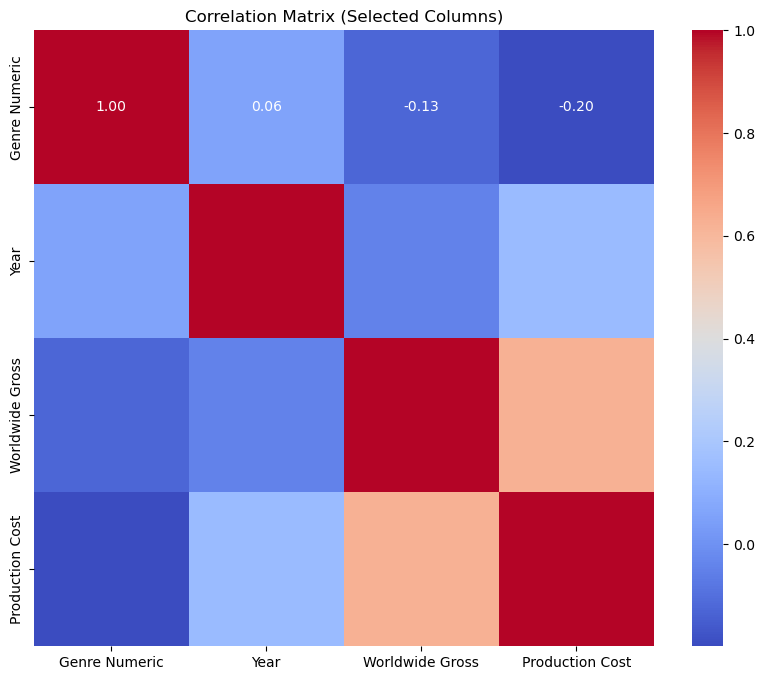

In [26]:
important_columns = ['Genre Numeric', 'Year', 'Worldwide Gross', 'Production Cost']
plt.figure(figsize=(10, 8))
correlation_matrix = data[important_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix (Selected Columns)')
plt.show()

Genre Counts:
First Genre
Action             228
Animation          143
Drama              106
Horror             104
Comedy              85
Adventure           60
Romance             57
Science Fiction     47
Crime               37
Fantasy             34
Thriller            31
Family              24
War                 11
Documentary          8
Mystery              6
Western              4
TV Movie             3
History              3
Music                2
Name: count, dtype: int64


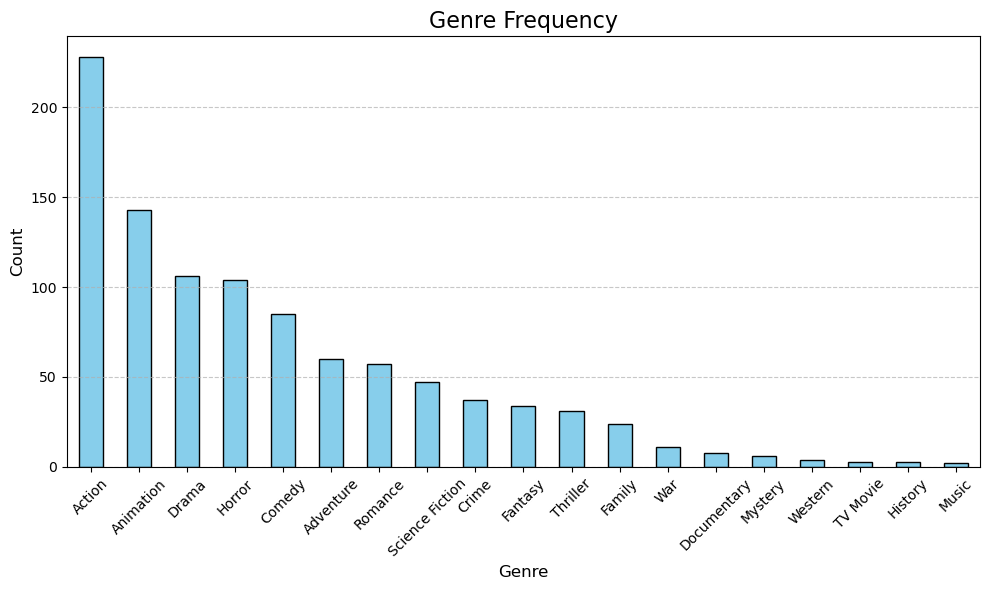

In [27]:
genre_counts = data['First Genre'].value_counts()

print("Genre Counts:")
print(genre_counts)

# Plot the genres
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Genre Frequency', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

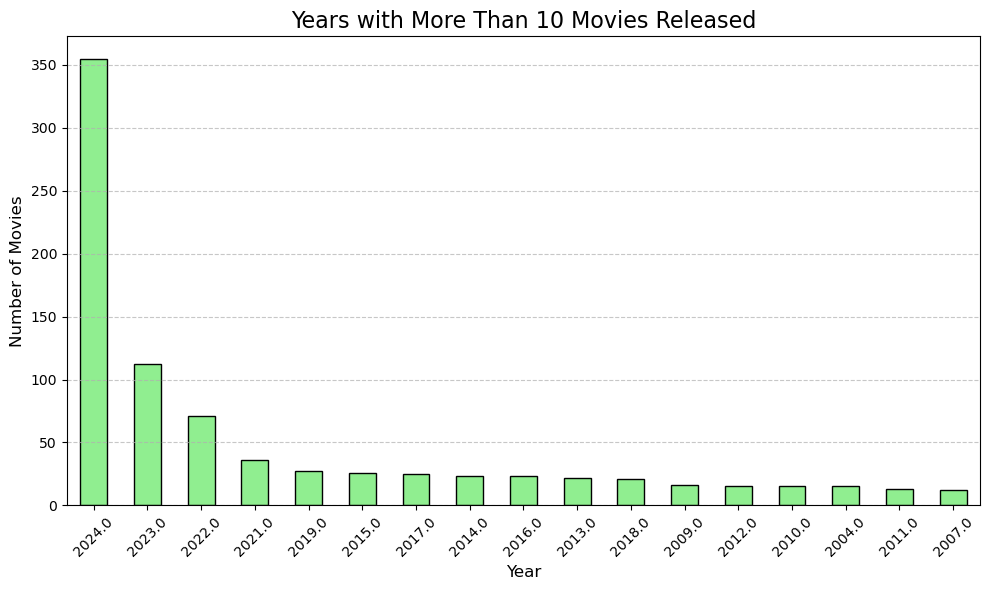

In [28]:
movies_per_year = data['Year'].value_counts()



# Filter years with more than 10 movies
years_with_more_than_10_movies = movies_per_year[movies_per_year > 10]

# Plot the years with more than 10 movies
plt.figure(figsize=(10, 6))
years_with_more_than_10_movies.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Years with More Than 10 Movies Released', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [29]:
Dfwork = data.copy()

In [30]:
Dfwork

,Rank,Title,Release Date,URL,Production Cost,Worldwide Gross,Genre,Runtime,Year,First Genre,Genre Numeric
0,1,Gladiator II,2024-11-05,https://www.gladiator.movie,3.100000e+08,4.354174e+08,"Action, Adventure, Drama",148,2024.0,Action,0
1,2,Your Fault,2024-12-26,https://www.amazon.com/dp/B0DJ1L7ZN3,8.730903e+07,3.485655e+08,"Romance, Drama",120,2024.0,Romance,13
2,3,Red One,2024-10-31,https://www.amazon.com/salp/redonemovie,2.500000e+08,1.828612e+08,"Action, Fantasy, Comedy",124,2024.0,Action,0
3,4,Venom: The Last Dance,2024-10-22,https://venom.movie,1.200000e+08,4.763919e+08,"Action, Science Fiction, Adventure, Thriller",109,2024.0,Action,0
4,5,Sonic the Hedgehog 3,2024-12-19,https://www.sonicthehedgehogmovie.com,1.220000e+08,2.115521e+08,"Action, Science Fiction, Comedy, Family",110,2024.0,Action,0
...,...,...,...,...,...,...,...,...,...,...,...
995,996,Annabelle: Creation,2017-08-03,http://annabellemovie.com,1.500000e+07,3.065922e+08,Horror,110,2017.0,Horror,10
996,997,One Week Friends,2022-06-18,https://www.themoviedb.org/movie/945675,8.730903e+07,3.485655e+08,Drama,106,2022.0,Drama,6
997,998,The Deep Dark,2023-11-15,https://www.themoviedb.org/movie/976830,8.730903e+07,3.485655e+08,"Adventure, Horror, Drama",103,2023.0,Adventure,1
998,999,The Mummy Returns,2001-05-04,https://www.themoviedb.org/movie/1734,9.800000e+07,4.432809e+08,"Adventure, Action, Fantasy",130,2001.0,Adventure,1


In [31]:
Dfwork.to_csv('cleaned_top-1000-movies.csv', index=False)